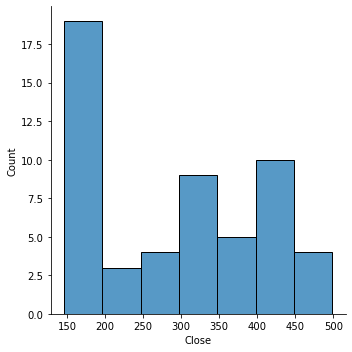

In [70]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import matplotlib_inline as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.metrics import r2_score
from tkinter import *


dataset = pd.read_csv('E:\TSLA.csv')

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
def outlier_Remover(dataset):
    Normal_Dataset = remove_outlier_IQR(dataset[['Close','High','Low','Open','Adj Close','Volume']])
    Normal_Dataset['Date'] = dataset['Date']
    mid = Normal_Dataset['Date']
    Normal_Dataset.drop(labels=['Date'], axis=1, inplace = True)
    Normal_Dataset.insert(0, 'Date', mid)
    Normal_Dataset.dropna(subset=['Close'],inplace=True)
    Normal_Dataset.dropna(subset=['Open'],inplace=True)
    Normal_Dataset.dropna(subset=['High'],inplace=True)
    Normal_Dataset.dropna(subset=['Low'],inplace=True)
    Normal_Dataset.dropna(subset=['Adj Close'],inplace=True)
    Normal_Dataset.dropna(subset=['Volume'],inplace=True)
    return Normal_Dataset
Normalized_Dataset = outlier_Remover(dataset)
Normalized_Dataset = Normalized_Dataset[Normalized_Dataset.Close != 695.000000]
Normalized_Dataset = Normalized_Dataset[Normalized_Dataset.Close != 597.950012]
Normalized_Dataset.describe()

sns.displot(Normalized_Dataset['Close'])


In [71]:


X = dataset[['Open','High','Low','Adj Close']]
Y= dataset['Close']
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regrssor = LinearRegression()
regrssor.fit(X_train,Y_train)
print(regrssor.intercept_)
print(regrssor.coef_)


1.4210854715202004e-14
[ 4.33726054e-16 -1.33226763e-15 -1.11022302e-16  1.00000000e+00]


In [86]:

y_pred = regrssor.predict(X_test)
df = pd.DataFrame({'Actual' : Y_test, 'Predicted':y_pred  })
df


,Actual,Predicted
2307,43.118000,43.118000
2147,67.706001,67.706001
22,3.988000,3.988000
1005,47.119999,47.119999
248,5.442000,5.442000
...,...,...
563,6.180000,6.180000
971,35.717999,35.717999
1335,45.402000,45.402000
188,4.650000,4.650000


<AxesSubplot:xlabel='Close', ylabel='Open'>

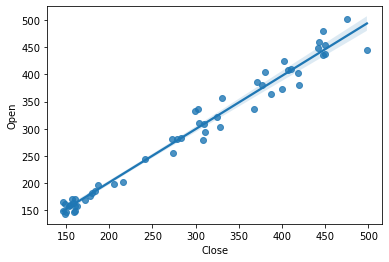

In [65]:
Normalized_Dataset.corr()
sns.regplot(x=Normalized_Dataset['Close'],y=Normalized_Dataset['Open'])

In [79]:
close_mean = Normalized_Dataset['Close'].mean()
X_Mean = X.mean()
sd_Close = st.stdev(Normalized_Dataset['Close'])
sd_Y = st.stdev(Y)
import scipy


zoe  0.9995442819643515 MAX 3.3165275302577917


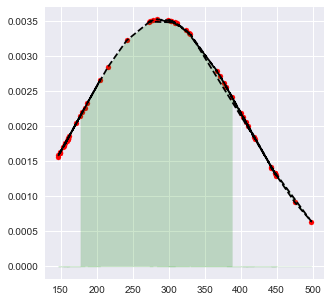

In [290]:

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
Q = np.random.normal(loc=close_mean, scale=sd_Close, size=1000)
u = stats.zscore(Q)
zoe_percentile,_ = scipy.integrate.quad(normalProbabilityDensity, np.NINF,u.max())
print('zoe ',zoe_percentile,'MAX', u.max())
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
x = Normalized_Dataset['Close']
y = pdf(x)
plt.style.use('seaborn')
plt.figure(figsize = (5, 5))
plt.plot(x, y, color = 'black',linestyle = 'dashed')
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
x_fill = x
y_fill = pdf(x_fill)
plt.fill_between(x_fill, y_fill, 0, alpha = 0.2, color = 'green')
plt.show()

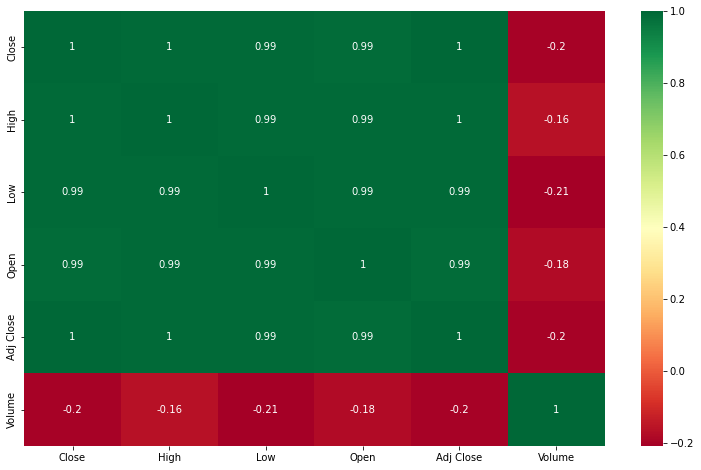

<Figure size 432x288 with 0 Axes>

In [49]:
corr_df = Normalized_Dataset.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")
heat_MAP = plt.figure()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Anaconda\envs\myenv\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\sheha\AppData\Local\Temp/ipykernel_13464/1405560505.py", line 67, in openbellCurve
    canvas = init_gui(window, update_function=redraw_figure)
  File "C:\Users\sheha\AppData\Local\Temp/ipykernel_13464/1405560505.py", line 37, in init_gui
    canvas.get_tk_widget().pack(side= openbellCurve.TOP, fill=openbellCurve.BOTH, expand=1)
  File "C:\Anaconda\envs\myenv\lib\tkinter\__init__.py", line 2101, in __getattr__
    return getattr(self.tk, attr)
AttributeError: '_tkinter.tkapp' object has no attribute 'TOP'


KeyboardInterrupt: 

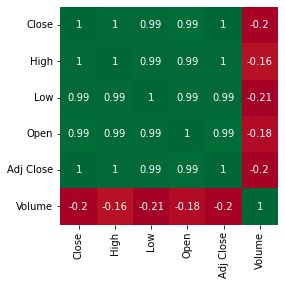

In [85]:
from tkinter import *
import tkinter
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
from typing import Callable
from matplotlib.backend_bases import key_press_handler
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk
window = Tk()
 
image = Image.open('C:/Users/sheha/Desktop/tesla.png')
# The (450, 350) is (height, width)
image = image.resize((300, 400), Image.ANTIALIAS)
my_img = ImageTk.PhotoImage(image)
# Slightly modified, this works for me
my_lbl = Label(image = my_img)
my_lbl.pack()
window.title("Tesla Stock Prediction")
window.geometry('700x400')






def init_gui(openbellCurve, update_function: Callable) -> FigureCanvasTkAgg:
    def event_key_press(event):
        print("you pressed {}".format(event.key))
        update_function()
        key_press_handler(event, canvas)

    # create empty figure and draw
    init_figure = create_figure()
    canvas = FigureCanvasTkAgg(init_figure, master=openbellCurve)
    canvas.draw()
    canvas.get_tk_widget().pack(side= openbellCurve.TOP, fill=openbellCurve.BOTH, expand=1)
    # call key press event
    canvas.mpl_connect("key_press_event", event_key_press)
    return canvas


def create_figure() -> Figure:
    # generate some data
    matrix = corr_df
    # plot the data
    figure = Figure(figsize=(13, 8))
    ax = figure.subplots()
    sns.heatmap(matrix, square=True, cbar=False,annot=True, cmap="RdYlGn")
    return figure


def redraw_figure():
    figure = create_figure()
    canvas.figure = figure
    canvas.draw()





def openbellCurve():
    newWindow = Toplevel(window)
    fig = Figure(figsize = (5, 5),dpi = 100)
    newWindow.title("Tesla Stock Prediction")
    newWindow.geometry('700x400')
    canvas = init_gui(window, update_function=redraw_figure)


canvas = ""
Title = Label(window,text = "Tesla Stock Prediction Sytem",font=("Arial Bold", 20)).place(x = 150,y = 10)
pred = Button(window, text = 'Display Bell Curve Graph', bd = '5',command = openbellCurve)
pred.place(x=100,y=100)
pred1 = Button(window, text = 'Heat Map of Correlation B/W data', bd = '5',command = window.destroy)
pred1.place(x=350,y=100)
pred2 = Button(window, text = 'Multiple Linear Regression Prediction', bd = '5',command = window.destroy)
pred2.place(x=100,y=200)
pred3 = Button(window, text = 'Prediction using Normal Distribution', bd = '5',command = window.destroy)
pred3.place(x=350,y=200)
pred4 = Button(window, text = 'OLS Summary', bd = '5',command = window.destroy)
pred4.place(x=100,y=300)
pred5 = Button(window, text = 'Add Data File', bd = '5',command = window.destroy)
pred5.place(x=350,y=300)
# pack is used to show the object in the window

window.mainloop()